In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

2022-06-18 13:50:04.181135: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-06-18 13:50:04.186132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-18 13:50:04.186149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# Reading the CSV file 
df = pd.read_csv("wine-reviews.csv", usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [3]:
df = df.dropna(subset=["description", "points"])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


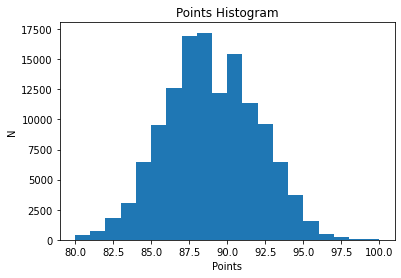

In [4]:
plt.hist(df.points, bins=20)
plt.title("Points Histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [5]:
#Splitting the dataset between above 90 and below 90 
df["label"] = (df.points >= 90).astype(int)
df = df[["description", "label"]]
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [7]:
# Splitting into the training validation and test datasets.
# We will draw random sample from the whole dataset
# 80% will be used in training, 10 percent for validation and 10% for testing
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [8]:
len(train), len(val),len(test)

(103976, 12997, 12998)

In [11]:
# Function converts each training, validation and test DataFrame into a tf.data.Dataset,
# then shuffles and bactches  of the data

def df_to_dataset(dataframe, shuffle=True, batch_size=1024):
    df = dataframe.copy()
    labels = df.pop('label')
    df = df["description"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [12]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [16]:
# We convert the tensorflow dataset to be able to visualize the dataset
list(train_data)[1]

(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b"Francis Mahoney has crafted a young, expressive Pinot Noir, and while it's not particularly complex, it shows real Carneros terroir. Dry and balanced, the wine has cherry, mushroom and earthy flavors, balanced with rich acids and a dusting of tannins. Drink now.",
        b'This straightforward Dolcetto offers varietal aromas of black cherry, licorice and hints of black pepper, all of which carry over to the palate. Simple but well made.',
        b'Aromas of white spring flower, mint and orchard fruit lead the way. Bright and silky, the refined palate delivers yellow apple, peach and Bartlett pear set against crisp acidity and a refined perlage.',
        ...,
        b"Delicate whiffs of tangerine and lime intensify on the palate of this Sp\xc3\xa4tlese Riesling, complemented by swathes of green herb and pine frond. It's superlight in texture, yet penetrating, showering the palate in sweet-tart grapefruit and Meyer lemon flav

### TensorFlow Hub
* It is repository of trained machine learning models ready for fine-tuning an deployable anywhere. 

## Embedding + Model


In [30]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [31]:
# We are transforming the text for description in an array of numbers 
# because NN work with number instead of text
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.50107366, -0.0548479 ,  0.02400308, ..., -0.2849824 ,
        -0.19349965, -0.00936328],
       [ 0.62042946,  0.05545886,  0.57640475, ..., -0.13751374,
        -0.04704522,  0.14372303],
       [ 0.20160088, -0.41786122, -0.4512068 , ...,  0.03937414,
         0.05791394, -0.13696545],
       ...,
       [ 0.328133  , -0.2232278 , -0.12598327, ..., -0.04794612,
         0.1341515 ,  0.11462799],
       [ 0.3821974 ,  0.20665279,  0.17611915, ..., -0.23864144,
        -0.38057292, -0.00869653],
       [ 0.1735738 , -0.290913  , -0.03755776, ...,  0.00165465,
         0.16342483, -0.27063018]], dtype=float32)>

### Building the model

In [32]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
# Adding dropout to remove layers that not as good to avoid overfitting 
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [34]:
model.evaluate(train_data)

102/102 [==============================] - 1s 8ms/step - loss: 0.6807 - accuracy: 0.6222


[0.6807467341423035, 0.6222493648529053]

In [35]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 8ms/step - loss: 0.6808 - accuracy: 0.6182


[0.6808233261108398, 0.6182196140289307]

In [40]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 37s 364ms/step - loss: 0.2448 - accuracy: 0.8969 - val_loss: 0.4338 - val_accuracy: 0.8301
Epoch 2/5
102/102 [==============================] - 31s 300ms/step - loss: 0.2310 - accuracy: 0.9032 - val_loss: 0.4462 - val_accuracy: 0.8296
Epoch 3/5
102/102 [==============================] - 30s 291ms/step - loss: 0.2206 - accuracy: 0.9069 - val_loss: 0.4872 - val_accuracy: 0.8319
Epoch 4/5
102/102 [==============================] - 30s 291ms/step - loss: 0.2097 - accuracy: 0.9110 - val_loss: 0.5077 - val_accuracy: 0.8313
Epoch 5/5
102/102 [==============================] - 30s 290ms/step - loss: 0.2001 - accuracy: 0.9137 - val_loss: 0.5008 - val_accuracy: 0.8301


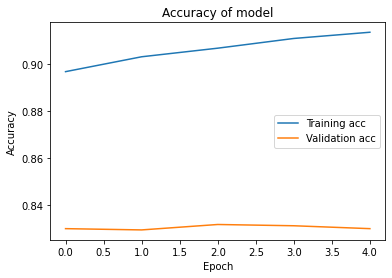

In [41]:
# Visualization of accuracies
plt.plot(history.history['accuracy'], label="Training acc")
plt.plot(history.history['val_accuracy'], label="Validation acc")
plt.title("Accuracy of model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

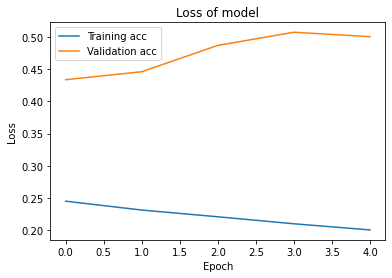

In [42]:
# Visualisation of losses
plt.plot(history.history['loss'], label="Training acc")
plt.plot(history.history['val_loss'], label="Validation acc")
plt.title("Loss of model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [43]:
# Evaluating our model on the test data
model.evaluate(test_data)

13/13 [==============================] - 1s 47ms/step - loss: 0.5151 - accuracy: 0.8228


[0.5151272416114807, 0.8228188753128052]

## LSTM

In [44]:
# An encoder to convert words to numbers
# Is the maximum number of words "2000" that you are going to be remembered
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)

encoder.adapt(train_data.map(lambda text, lable: text))


In [45]:
## Getting the vocabulary
vocab = np.array(encoder.get_vocabulary())
vocab[:50]

#[UNK] represents any unknown tokens

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that', 'acidity', 'finish', 'from', 'but', 'tannins',
       'drink', 'cherry', 'ripe', 'are', 'black', 'has', 'for', 'by',
       'notes', 'red', 'spice', 'as', 'an', 'rich', 'fresh', 'nose',
       'oak', 'berry', 'dry', 'now', 'plum', 'soft', 'fruits', 'blend',
       'crisp'], dtype='<U17')

In [47]:
model = tf.keras.Sequential([
    #The encoder is going to vectorize our text
    encoder, 
    # We are having embedding for the vectorized text
    #Embedding is a mapping of a discrete, categorical variable to a vector of continuous numbers
    tf.keras.layers.Embedding(
        input_dim =len(encoder.get_vocabulary()), 
        output_dim=32,
        mask_zero=True
    ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.4), 
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [49]:
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 2s 133ms/step - loss: 0.6931 - accuracy: 0.5100


[0.6931431889533997, 0.5100407600402832]

In [50]:
history = model.fit(train_data, epochs=5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 26s 215ms/step - loss: 0.5396 - accuracy: 0.7155 - val_loss: 0.3787 - val_accuracy: 0.8273
Epoch 2/5
102/102 [==============================] - 29s 281ms/step - loss: 0.3655 - accuracy: 0.8353 - val_loss: 0.3590 - val_accuracy: 0.8367
Epoch 3/5
102/102 [==============================] - 29s 285ms/step - loss: 0.3490 - accuracy: 0.8434 - val_loss: 0.3618 - val_accuracy: 0.8357
Epoch 4/5
102/102 [==============================] - 23s 228ms/step - loss: 0.3410 - accuracy: 0.8466 - val_loss: 0.3568 - val_accuracy: 0.8406
Epoch 5/5
102/102 [==============================] - 27s 260ms/step - loss: 0.3374 - accuracy: 0.8493 - val_loss: 0.3556 - val_accuracy: 0.8380


In [51]:
model.evaluate(test_data)

13/13 [==============================] - 1s 72ms/step - loss: 0.3478 - accuracy: 0.8418


[0.3477984368801117, 0.8418217897415161]